In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from dmba import classificationSummary
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer

## DATA PREPROCESSING ##

<h3 align="center">Load Data</h3>

In [2]:
KSI_df= pd.read_csv('TOTAL_KSI_USE.csv',index_col=0)

In [3]:
KSI_df.info()
# remove trailing spaces from column names 
KSI_df.columns = KSI_df.columns.str.strip()

<class 'pandas.core.frame.DataFrame'>
Index: 4739 entries, 14218 to 18956
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DATE               4739 non-null   object 
 1   STREET1            4739 non-null   object 
 2   STREET2            4293 non-null   object 
 3   DISTRICT           4524 non-null   object 
 4   LATITUDE           4739 non-null   float64
 5   LONGITUDE          4739 non-null   float64
 6   TRAFFCTL           4693 non-null   object 
 7   VISIBILITY         4717 non-null   object 
 8   LIGHT              4735 non-null   object 
 9   RDSFCOND           4717 non-null   object 
 10  ACCLASS            4738 non-null   object 
 11  IMPACTYPE          4712 non-null   object 
 12  INVTYPE            4730 non-null   object 
 13  INVAGE             4739 non-null   object 
 14  INJURY             2690 non-null   object 
 15  NEIGHBOURHOOD_158  4739 non-null   object 
dtypes: float64(2), object(14

<h3 align="center">Drop Columns</h3>

In [4]:
# Drop date colun
KSI_df= KSI_df.drop('DATE', axis =1)

<h3 align="center">Checking for Missing Values</h3>

In [5]:
# Assess the percentage of null values
null_values = round((KSI_df.isnull().sum()/KSI_df.shape[0])*100,4)
null_values

STREET1               0.0000
STREET2               9.4113
DISTRICT              4.5368
LATITUDE              0.0000
LONGITUDE             0.0000
TRAFFCTL              0.9707
VISIBILITY            0.4642
LIGHT                 0.0844
RDSFCOND              0.4642
ACCLASS               0.0211
IMPACTYPE             0.5697
INVTYPE               0.1899
INVAGE                0.0000
INJURY               43.2370
NEIGHBOURHOOD_158     0.0000
dtype: float64

<h3 align="center">Check Duplicates</h3>

In [6]:
#Check for duplicate values
total_duplicates = KSI_df.duplicated().head(18957).sum()
print("The total number of duplicated rows are:", total_duplicates)

The total number of duplicated rows are: 111


<h3 align="center">Drop Duplicates</h3>

In [7]:
#Remove duplicated values
KSI_df = KSI_df.drop_duplicates()
total_duplicates = KSI_df.duplicated().head(18957).sum()
print("The total number of duplicated rows are:", total_duplicates)

The total number of duplicated rows are: 0


<h3 align="center">Assess Skewness</h3>

In [8]:
#Check if numerical columns are normal
num_col = [col for col in KSI_df.columns if (KSI_df[col].dtype != 'object')& (KSI_df[col].dtype != 'datetime64[ns]') ]
skew = KSI_df[num_col].skew()

print('The skewness for numerical colums are:', skew)

The skewness for numerical colums are: LATITUDE     0.256617
LONGITUDE    0.114678
dtype: float64


**No columns are skewed given its less than 0.5**

<h3 align="center">Visualizing Skewness</h3>

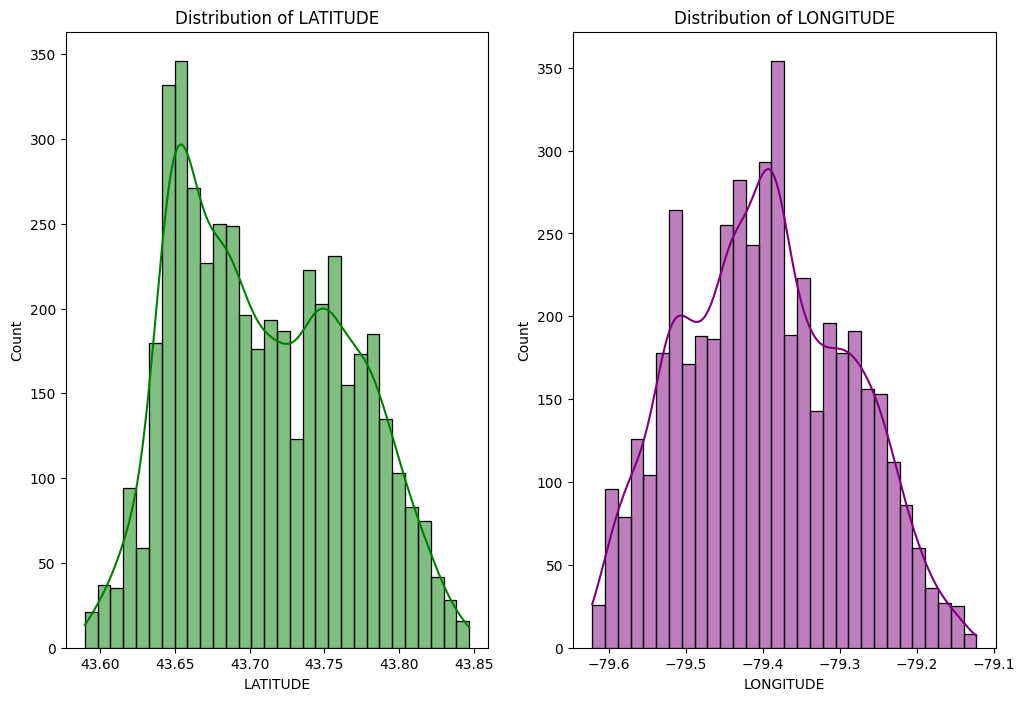

In [9]:
fig,axes = plt.subplots(1, 2,figsize=(12, 8)) 

#Create a histogram for the entire DataFrame
sns.histplot(KSI_df['LATITUDE'],ax=axes[0],kde=True, color='green', bins=30).set_title('Distribution of LATITUDE')
sns.histplot(KSI_df['LONGITUDE'],ax=axes[1],kde=True, color='purple', bins=30).set_title('Distribution of LONGITUDE')


# Show the plot
plt.show()

<h3 align="center">Check for Outliers</h3>

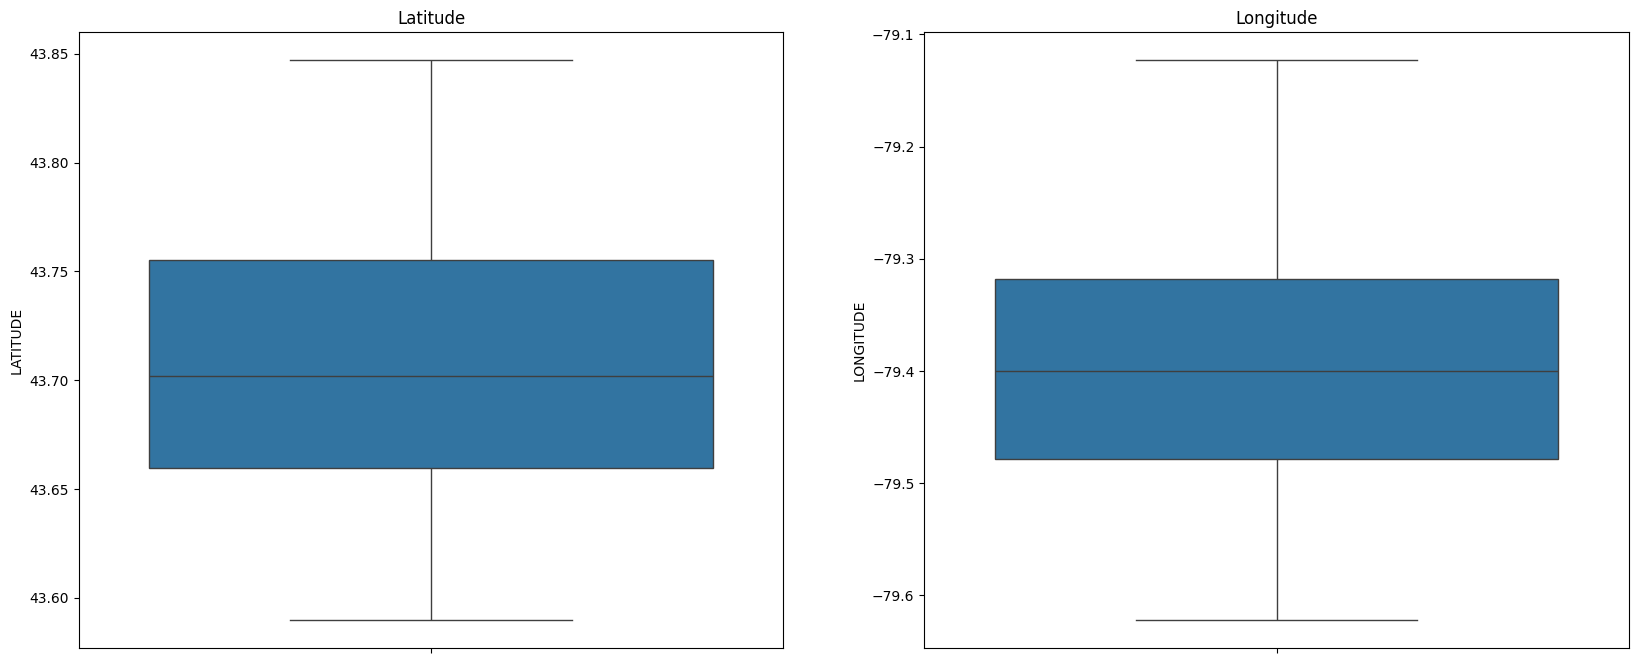

In [10]:
#Check for Outliers
fig, axes = plt.subplots(1, 2,figsize=(20, 8)) 

#Create a box plot for the entire DataFrame
sns.boxplot(KSI_df['LATITUDE'],ax=axes[0]).set_title('Latitude')
sns.boxplot(KSI_df['LONGITUDE'],ax=axes[1]).set_title('Longitude')

# Show the plot
plt.show()

**There were no outliers present among numerical variables**

## FEATURE ENGINEERING ##

<h3 align="center">Modal Imputation</h3>

In [11]:
#For object columns with null values, do modal imputation using Simple Imputer
obj_col = [col for col in KSI_df.columns if KSI_df[col].dtype == 'object']

# The Imputer object uses the mode strategy as data is categorical
imputer = SimpleImputer(strategy ='most_frequent')

# Fitting the data to the imputer object
KSI_df[obj_col] = imputer.fit_transform(KSI_df[obj_col])

<h3 align="center">Check Missing Values After Imputation</h3>

In [12]:
# Assess the percentage of null values
null_values = round((KSI_df.isnull().sum()/KSI_df.shape[0])*100,4)
null_values

STREET1              0.0
STREET2              0.0
DISTRICT             0.0
LATITUDE             0.0
LONGITUDE            0.0
TRAFFCTL             0.0
VISIBILITY           0.0
LIGHT                0.0
RDSFCOND             0.0
ACCLASS              0.0
IMPACTYPE            0.0
INVTYPE              0.0
INVAGE               0.0
INJURY               0.0
NEIGHBOURHOOD_158    0.0
dtype: float64

<h3 align="center">Isolate Columns for Data Export</h3>

In [13]:
# Get the DISTRICT values for the test set rows from the original DataFrame
district_column = KSI_df['DISTRICT']


<h3 align="center">One Hot Encoding</h3>

In [14]:
#Identify all categorical variables
cat_variables = [col for col in KSI_df.columns if col != 'NEIGHBOURHOOD_158' and KSI_df[col].dtype != 'float64']

#Onehot encoding for independent variables only
KSI_df = pd.get_dummies(KSI_df, columns= cat_variables,drop_first=True)

#Identify dummy columns and convert boolean values to integers
dummy_col = [col for col in KSI_df.columns if KSI_df[col].dtype == 'bool']
KSI_df[dummy_col] = KSI_df[dummy_col].astype(int)




In [15]:
KSI_df.head(5)

,LATITUDE,LONGITUDE,NEIGHBOURHOOD_158,STREET1_100 MCLEVIN AVE,STREET1_1035 SHEPPARD AVE W,STREET1_106 BEECH AVE,STREET1_106 LAWRENCE AVE E,STREET1_107 THE QUEENSWAY,STREET1_1085 ROYAL YORK RD,STREET1_109 DOWNSVIEW AVE,...,INVAGE_70 to 74,INVAGE_75 to 79,INVAGE_80 to 84,INVAGE_85 to 89,INVAGE_90 to 94,INVAGE_Over 95,INVAGE_unknown,INJURY_Major,INJURY_Minimal,INJURY_Minor
14218,43.692008,-79.361987,Leaside-Bennington,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14219,43.795016,-79.216319,Malvern East,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14220,43.795016,-79.216319,Malvern East,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
14223,43.795016,-79.216319,Malvern East,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14224,43.795016,-79.216319,Malvern East,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


## NEURAL NETWORK MODEL ##

<h3 align="center">Train and Test Split</h3>

In [16]:
#Identify all independent variables
independent_variables = [col for col in KSI_df.columns if col != 'NEIGHBOURHOOD_158' and KSI_df[col].dtype != 'float64']

#Independent variables
X = KSI_df[independent_variables]

#Dependent variable
y = KSI_df['NEIGHBOURHOOD_158']

# 70 % training data and 30% allocated to the temporary set which will be split into validation and test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.30, random_state=42)




<h3 align="center">Model Implementation</h3>

In [17]:


clf = MLPClassifier(hidden_layer_sizes=(20), activation='logistic', solver='lbfgs',random_state=42)
clf.fit(X_train, y_train)
predictions = clf.predict(X_temp)
print(predictions)



['Junction Area' 'Humber Summit' 'Oakwood Village' ... 'Milliken'
 'Glenfield-Jane Heights' 'Trinity-Bellwoods']


<h3 align="center">Model Evaluation</h3>

In [18]:
from sklearn import metrics 
print("Accuracy of Model Test:", round(metrics.accuracy_score(y_temp, predictions)*100,2),"%")


Accuracy of Model Test: 86.25 %


<h3 align="center">Export Results</h3>

In [19]:
# Assuming X_test was a subset of KSI_df and you have its indices
test_indices = X_temp.index  # Get the indices of X_test rows in KSI_df

# Now, extract the corresponding 'LATITUDE' and 'LONGITUDE' from KSI_df using these indices
matching_rows = KSI_df.loc[test_indices, ['LATITUDE', 'LONGITUDE']] # Get lat/lon for the test set rows

# Create a DataFrame with the predictions and corresponding lat/lon values
predicted_df = pd.DataFrame({
    'Prediction': predictions,
    'Latitude': matching_rows['LATITUDE'].values,
    'Longitude': matching_rows['LONGITUDE'].values,
      
})

predicted_df['DISTRICT'] = district_column.loc[test_indices].values
# Add the actual target values from KSI_df (for comparison with predictions)
predicted_df['ACTUAL'] = KSI_df.loc[test_indices, 'NEIGHBOURHOOD_158'].values
predicted_df.head(5)

,Prediction,Latitude,Longitude,DISTRICT,ACTUAL
0,Junction Area,43.664412,-79.458736,North York,Junction Area
1,Humber Summit,43.628871,-79.516948,Etobicoke York,Stonegate-Queensway
2,Oakwood Village,43.689456,-79.439487,North York,Oakwood Village
3,Humber Bay Shores,43.614878,-79.488620,Etobicoke York,Humber Bay Shores
4,Woburn North,43.772071,-79.251460,Scarborough,Woburn North


In [20]:
excel_filename = "predicted_data.xlsx"
predicted_df.to_excel(excel_filename)